<a href="https://colab.research.google.com/github/anpham1331/ECGR4105-Intro-to-ML/blob/main/ECGR_4105_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
#https://github.com/anpham1331/ECGR4105-Intro-to-ML/tree/main

#uses Housing.csv for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

path_file = "/content/drive/MyDrive/Colab Notebooks/Housing.csv"
housing = pd.read_csv(path_file)

# Checking Null values
housing.isnull().sum()*100/housing.shape[0] #There are no NULL values in the dataset, hence it is clean.

# List of variables to map. yes = 1, no = 0
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
print(df_train.columns)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


<ipython-input-128-b575ceb9542d>:24: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-128-b575ceb9542d>:25: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_b_val)) * np.sum(np.square(X_b_val.dot(theta) - y_test))
<ipython-input-128-b575ceb9542d>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


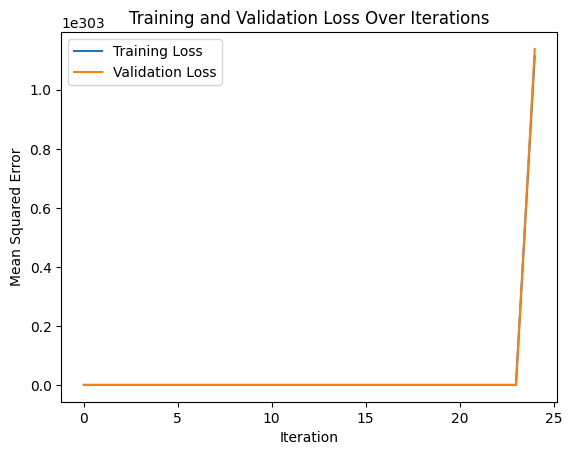

In [128]:
#Problem 1a
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_b_val)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

<ipython-input-129-4e33b2ef38df>:24: RuntimeWarning: overflow encountered in square
  train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
<ipython-input-129-4e33b2ef38df>:25: RuntimeWarning: overflow encountered in square
  val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))
<ipython-input-129-4e33b2ef38df>:22: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradients


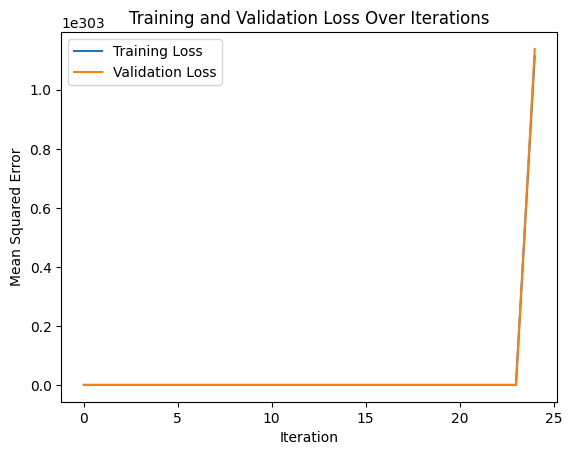

In [129]:
#Problem 1b
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


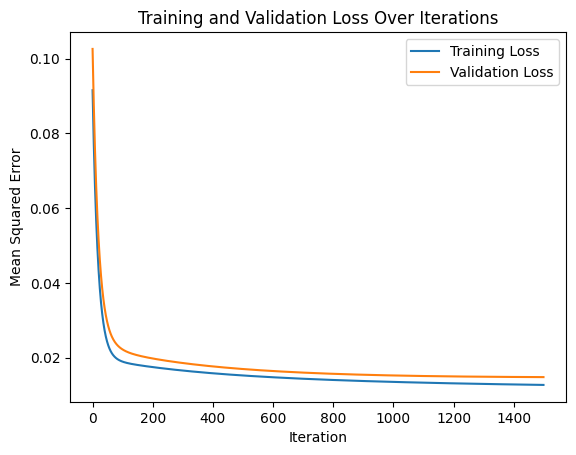

In [130]:
#Problem 2a - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

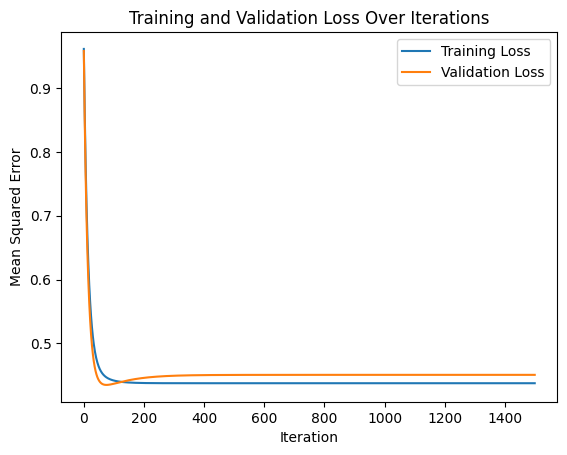

In [131]:
#Problem 2a - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

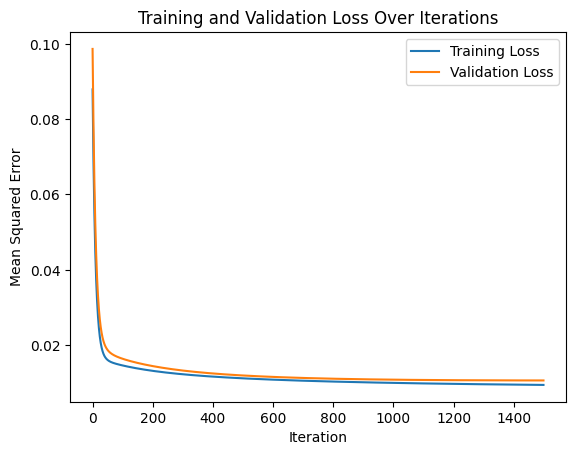

In [132]:
#Problem 2b - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

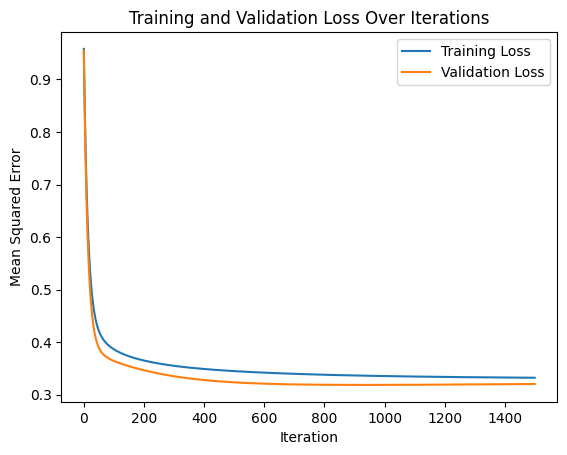

In [133]:
#Problem 2b - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


#Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

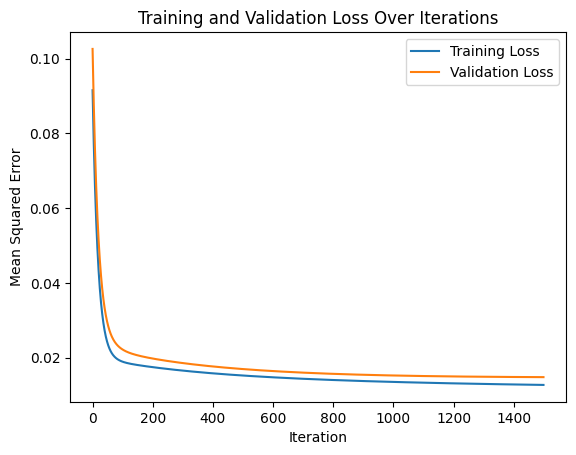

In [134]:
#Problem 3a - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


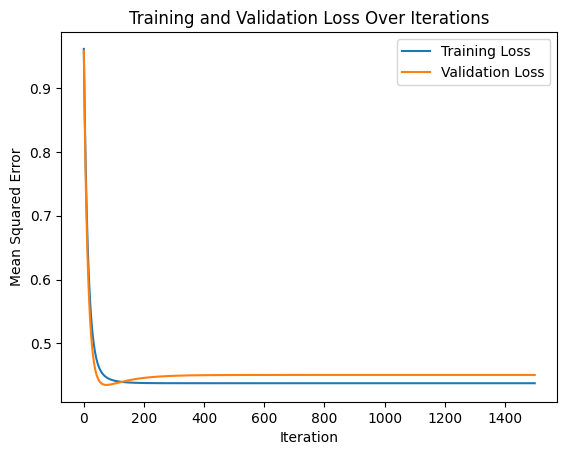

In [135]:
#Problem 3a - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()




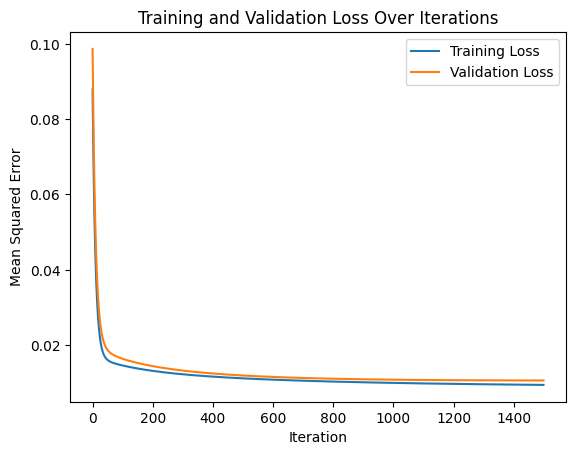

In [136]:
#Problem 3b - Normalization
from sklearn.preprocessing import MinMaxScaler #Uses min-max scaling
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

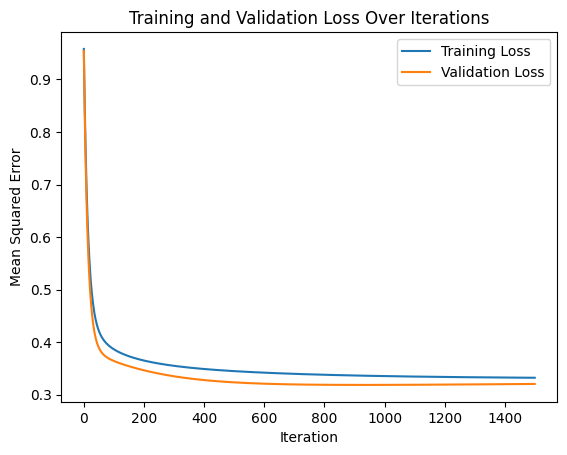

In [137]:
#Problem 3b - Standardization
from sklearn.preprocessing import StandardScaler #Uses standard scaling
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_train = df_train['price'].values

X_test = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom','basement','hotwaterheating','airconditioning','parking','prefarea']].values
y_test = df_test['price'].values

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_test), 1)), X_test]

# initial values
theta = np.zeros(X_b_train.shape[1])
iterations = 1500
alpha = 0.01
m = len(X_train)

train_losses = []
val_losses = []

lambda_ = 1  # You can adjust the value of lambda as needed

for iteration in range(iterations):
    # Calculate gradients with regularization term
    gradients = (2/m) * (X_b_train.T.dot(X_b_train.dot(theta) - y_train) + lambda_ * theta**2)

    # Update parameters using the regularized gradients
    theta -= alpha * gradients

    # Calculate training loss with regularization term
    train_loss = (1/m) * (np.sum(np.square(X_b_train.dot(theta) - y_train)) )

    val_loss = (1/len(X_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

#plot
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()